 # Exploratory Data Analysis on the Zillow Home Prices Data
 
 ## Loading the libraries and data set

`ggplot2` and `tidyverse` libraries are used for data visualization and munging
The `lubridate` library is used here for easy operations with datetime objects.
The `fiftystater` and the `geofacet` packages are used for plotting the given values across the 50 states of the USA.
 

In [3]:
library(tidyverse)
library(ggplot2)
library(lubridate)
library(fiftystater)
library(geofacet)
library(magrittr)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date


Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract



In [4]:
# data read

state <- read.csv(file = 'State_time_series.csv')

## Introduction

Zillow collects , processes and publishes housing and economic data from a variety of propriety sources.To get an idea of the data we have, we shall ask several questions.

* How do the home values vary by tier type?
* How do the home values vary by time by tier?
* How do the rent to price ratio of homes change by state?
* How do the number of days on the Zillow database vary with the median value?
* How does the median value of the house rent per square feet change with time?


## How do the home values change by tier?

In [5]:
head(state, 10)

Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,⋯,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
1996-04-30,Alabama,NA,NA,NA,NA,NA,NA,NA,NA,⋯,45600,99500,79500,79000,140200,NA,NA,NA,NA,NA
1996-04-30,Arizona,NA,NA,NA,NA,NA,NA,NA,NA,⋯,67100,78900,103600,107500,168700,NA,NA,NA,NA,NA
1996-04-30,Arkansas,NA,NA,NA,NA,NA,NA,NA,NA,⋯,38400,70300,64400,64500,115200,NA,NA,NA,NA,NA
1996-04-30,California,NA,NA,NA,NA,NA,NA,NA,NA,⋯,95100,136100,157900,162000,270600,NA,NA,NA,NA,NA
1996-04-30,Colorado,NA,NA,NA,NA,NA,NA,NA,NA,⋯,82700,99400,128100,133600,209300,NA,NA,NA,NA,NA
1996-04-30,Connecticut,NA,NA,NA,NA,NA,NA,NA,NA,⋯,83700,85000,132000,141000,231600,NA,NA,NA,NA,NA
1996-04-30,Delaware,NA,NA,NA,NA,NA,NA,NA,NA,⋯,77200,NA,106800,107400,161600,NA,NA,NA,NA,NA
1996-04-30,Florida,NA,NA,NA,NA,NA,NA,NA,NA,⋯,52500,70600,86300,92100,155300,NA,NA,NA,NA,NA
1996-04-30,Georgia,NA,NA,NA,NA,NA,NA,NA,NA,⋯,57200,89300,92000,92400,163900,NA,NA,NA,NA,NA
1996-04-30,Hawaii,NA,NA,NA,NA,NA,NA,NA,NA,⋯,144500,177000,227400,262600,374700,NA,NA,NA,NA,NA


In [8]:
tier <- names(state)[grepl('Tier',names(state))]

In [9]:
total_distribution <- state %>%
    select(ends_with('Tier')) %>% mutate(date=state$Date) %>%
  mutate(date=ymd(date)) %>%
  na.omit() %>%
  gather(type,value,1:3) %>%
  select(value)

In [10]:
head(total_distribution)

value
45600
67100
38400
95100
82700
83700


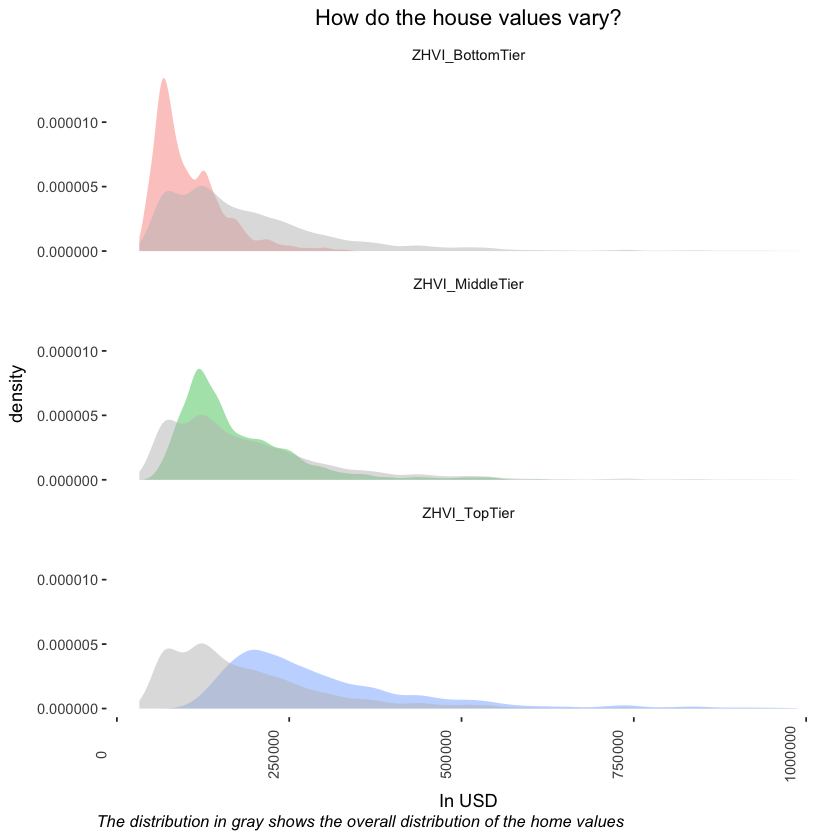

In [11]:
options(scipen=999)
state %>%
  select(ends_with('Tier')) %>% mutate(date=state$Date) %>%
  mutate(date=ymd(date)) %>%
  na.omit() %>%
  gather(type,value,1:3) %>%
  ggplot(aes(x=value,fill=type))+geom_density(alpha=0.4,color='transparent')+facet_wrap(~type,nrow = 3)+
  theme(panel.background = element_rect(fill = '#ffffff'),
        axis.text.x = element_text(vjust=-1,angle=90),
        strip.background = element_blank(),
        legend.position = 'none',plot.title = element_text(hjust=0.5),plot.caption = element_text(hjust=-0.05,face='italic'))+labs(title='How do the house values vary?',x='In USD',caption='The distribution in gray shows the overall distribution of the home values')+geom_density(data=total_distribution,aes(x=value),fill='gray',color='transparent',alpha=0.5)